# Recolección de datos electorales en Ecuador año 2017 (1era vuelta)

Empezamos recolectando la información de las elecciones correspondientes al año 2017 de la página oficial del [CNE](http://cne.gob.ec/es/estadisticas/bases-de-datos)

Nos dirigimos a la carpeta de elecciones generales del año 2006, y recopilamos la información necesaria. Una vez descargados los archivos y exportados en formato csv, procedemos a subirlos a nuestro notebook.

## Descargando las bibliotecas necesarias para trabajar y limpiando las tablas

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mp 
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\HP\Documents\GitHub\Proyecto_Datos_Elecciones_Ecuador_2002_2017\2017\1ra vuelta")
df_p2017=pd.read_csv('p2013.csv')
df_p2017.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,7,EL ORO,360,ZARUMA,5,ABANIN,RURAL
1,13,MANABI,440,PORTOVIEJO,10,ABDON CALDERON,RURAL
2,1,AZUAY,285,SANTA ISABEL,15,ABDON CALDERON / LA UNION,RURAL
3,6,CHIMBORAZO,215,ALAUSI,20,ACHUPALLAS,RURAL
4,15,NAPO,620,TENA,25,AHUANO,RURAL


In [3]:
df_c2017=pd.read_csv('c2017.csv')
df_c2017.head()

,DIGNIDAD_CODIGO,DIGNIDAD_NOMBRE,OP_CODIGO,NUM_PARTIDO,CANDIDATO_CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_GRUPO_EDAD,CANDIDATO_TERRITORIO_CODIGO,...,CANDIDATO_PROVINCIA_NOMBRE,CANDIDATO_CIRCUNSCRIPCION_CODIGO_ORIGINAL,CANDIDATO_CIRCUNSCRIPCION_CODIGO,CANDIDATO_CIRCUNSCRIPCION_NOMBRE,SUPLENTE1_NOMBRE,SUPLENTE1_SEXO,SUPLENTE1_GRUPO_EDAD,SUPLENTE2_NOMBRE,SUPLENTE2_SEXO,SUPLENTE2_GRUPO_EDAD
0,9,9,700,8,1239,7,BERMEO ALVEAR MARCO VINICIO,1,6,1,...,0,0,0,0,REYES GARLING BARBARA ELEEN,2,3,NaN,,
1,7,7,720,1,201,1,LARRIVA ALVARADO OSCAR OSWALDO,1,6,1,...,1,0,10,10,CABRERA FAJARDO ELSA PIEDAD,2,3,NaN,,
2,9,9,620,3,1794,11,MALDONADO AGUIRRE SEGUNDO CESAR,1,6,1,...,0,0,0,0,REA ELIZALDE THALIA VANESSA,2,1,NaN,,
3,7,7,721,10,1405,1,HEREDIA TAPIA ALFONSO,1,6,1,...,1,0,10,10,FLORES SARMIENTO MARIA BELEN,2,1,NaN,,
4,7,7,721,10,1417,4,ORTEGA CAMPOVERDE CONSEPCION AIDA,2,6,1,...,1,0,10,10,GARCIA JARAMILLO WILSON NOLBERTO,1,4,NaN,,


In [4]:
df_1V2017=pd.read_csv('R1V2017.csv', low_memory=False)
df_1V2017.head()

,COD_DIGNIDAD,COD_PROVINCIA,PROVINCIA_NOMBRE,COD_CIRCUNSCRIPCION,CIRCUNSCRIPCION_CODIGO,CIRCUNSCRIPCION_NOMBRE,COD_CANTON,CANTON_NOMBRE,COD_PARROQUIA,PARROQUIA_NOMBRE,SEX_JUNTA,COD_CANDIDATO,VOTOS_CANDIDATO,ELECTORES,BLANCOS,NULOS,SUFRAGANTES
0,1,1,1,0,10,10,260,260,285,285,F,16,2313,11612,269,679,9294
1,1,1,1,0,10,10,260,260,285,285,F,143,812,11612,269,679,9294
2,1,1,1,0,10,10,260,260,285,285,F,493,588,11612,269,679,9294
3,1,1,1,0,10,10,260,260,285,285,F,502,3922,11612,269,679,9294
4,1,1,1,0,10,10,260,260,285,285,F,621,64,11612,269,679,9294


Antes de nada, procedemos a limpiar la tabla de candidatos. Analizamos sus columnas primero.

In [5]:
df_c2017.dtypes

DIGNIDAD_CODIGO                               int64
DIGNIDAD_NOMBRE                               int64
OP_CODIGO                                     int64
NUM_PARTIDO                                   int64
CANDIDATO_CODIGO                              int64
CANDIDATO_ORDEN_LISTA                         int64
CANDIDATO_NOMBRE                             object
CANDIDATO_SEXO                                int64
CANDIDATO_GRUPO_EDAD                          int64
CANDIDATO_TERRITORIO_CODIGO                   int64
CANDIDATO_TERRITORIO_NOMBRE                   int64
CANDIDATO_PROVINCIA_CODIGO                    int64
CANDIDATO_PROVINCIA_NOMBRE                    int64
CANDIDATO_CIRCUNSCRIPCION_CODIGO_ORIGINAL     int64
CANDIDATO_CIRCUNSCRIPCION_CODIGO              int64
CANDIDATO_CIRCUNSCRIPCION_NOMBRE              int64
SUPLENTE1_NOMBRE                             object
SUPLENTE1_SEXO                                int64
SUPLENTE1_GRUPO_EDAD                          int64
SUPLENTE2_NO

In [6]:
df_c2017=df_c2017.drop(['CANDIDATO_CIRCUNSCRIPCION_CODIGO','DIGNIDAD_NOMBRE','CANDIDATO_CIRCUNSCRIPCION_CODIGO_ORIGINAL','CANDIDATO_PROVINCIA_CODIGO','CANDIDATO_TERRITORIO_CODIGO','CANDIDATO_TERRITORIO_NOMBRE'], axis=1)
df_c2017=df_c2017.drop(['CANDIDATO_CIRCUNSCRIPCION_NOMBRE','CANDIDATO_SEXO','CANDIDATO_GRUPO_EDAD','SUPLENTE1_NOMBRE','SUPLENTE1_SEXO','SUPLENTE1_GRUPO_EDAD'], axis=1)
df_c2017=df_c2017.drop(['SUPLENTE2_NOMBRE','SUPLENTE2_SEXO','SUPLENTE2_GRUPO_EDAD'], axis=1)
df_c2017.head()

,DIGNIDAD_CODIGO,OP_CODIGO,NUM_PARTIDO,CANDIDATO_CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE,CANDIDATO_PROVINCIA_NOMBRE
0,9,700,8,1239,7,BERMEO ALVEAR MARCO VINICIO,0
1,7,720,1,201,1,LARRIVA ALVARADO OSCAR OSWALDO,1
2,9,620,3,1794,11,MALDONADO AGUIRRE SEGUNDO CESAR,0
3,7,721,10,1405,1,HEREDIA TAPIA ALFONSO,1
4,7,721,10,1417,4,ORTEGA CAMPOVERDE CONSEPCION AIDA,1


In [7]:
df_c2017.dtypes

DIGNIDAD_CODIGO                int64
OP_CODIGO                      int64
NUM_PARTIDO                    int64
CANDIDATO_CODIGO               int64
CANDIDATO_ORDEN_LISTA          int64
CANDIDATO_NOMBRE              object
CANDIDATO_PROVINCIA_NOMBRE     int64
dtype: object

In [8]:
df_c2017=df_c2017.drop(['CANDIDATO_PROVINCIA_NOMBRE'], axis=1)
df_c2017.head()

,DIGNIDAD_CODIGO,OP_CODIGO,NUM_PARTIDO,CANDIDATO_CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,9,700,8,1239,7,BERMEO ALVEAR MARCO VINICIO
1,7,720,1,201,1,LARRIVA ALVARADO OSCAR OSWALDO
2,9,620,3,1794,11,MALDONADO AGUIRRE SEGUNDO CESAR
3,7,721,10,1405,1,HEREDIA TAPIA ALFONSO
4,7,721,10,1417,4,ORTEGA CAMPOVERDE CONSEPCION AIDA


De la tabla de resultados, también eliminamos las columnas sin importancia.

In [9]:
df_1V2017.dtypes

COD_DIGNIDAD               int64
COD_PROVINCIA              int64
PROVINCIA_NOMBRE           int64
COD_CIRCUNSCRIPCION        int64
CIRCUNSCRIPCION_CODIGO     int64
CIRCUNSCRIPCION_NOMBRE     int64
COD_CANTON                 int64
CANTON_NOMBRE              int64
COD_PARROQUIA              int64
PARROQUIA_NOMBRE           int64
SEX_JUNTA                 object
COD_CANDIDATO              int64
VOTOS_CANDIDATO            int64
ELECTORES                  int64
BLANCOS                    int64
NULOS                      int64
SUFRAGANTES               object
dtype: object

In [10]:
df_1V2017=df_1V2017.drop(['PROVINCIA_NOMBRE','COD_CIRCUNSCRIPCION','CIRCUNSCRIPCION_CODIGO','CIRCUNSCRIPCION_NOMBRE','SEX_JUNTA','CANTON_NOMBRE'], axis=1)
df_1V2017=df_1V2017.drop(['ELECTORES','SUFRAGANTES','PARROQUIA_NOMBRE'], axis=1)
df_1V2017.head()

,COD_DIGNIDAD,COD_PROVINCIA,COD_CANTON,COD_PARROQUIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS
0,1,1,260,285,16,2313,269,679
1,1,1,260,285,143,812,269,679
2,1,1,260,285,493,588,269,679
3,1,1,260,285,502,3922,269,679
4,1,1,260,285,621,64,269,679


Una vez reducidas la cantidad de columnas, verificamos la probabilidad de datos duplicados en nuestra tabla.

In [11]:
df_1V2017.count()

COD_DIGNIDAD       883496
COD_PROVINCIA      883496
COD_CANTON         883496
COD_PARROQUIA      883496
COD_CANDIDATO      883496
VOTOS_CANDIDATO    883496
BLANCOS            883496
NULOS              883496
dtype: int64

Por lo visto no existen filas duplicadas, por lo que continuamos con nuestra depuración. Una vez eliminadas las filas duplicadas, revisamos si existan filas que posean datos nulos. Utilizamos el siguiente código.

In [12]:
print(df_1V2017.isnull().sum())

COD_DIGNIDAD       0
COD_PROVINCIA      0
COD_CANTON         0
COD_PARROQUIA      0
COD_CANDIDATO      0
VOTOS_CANDIDATO    0
BLANCOS            0
NULOS              0
dtype: int64


Por lo visto no existen datos nulos, por lo que continuamos con el arreglo de nuestras tablas de información.

In [13]:
df_1V2017=df_1V2017.astype(np.int16)
df_1V2017.dtypes

COD_DIGNIDAD       int16
COD_PROVINCIA      int16
COD_CANTON         int16
COD_PARROQUIA      int16
COD_CANDIDATO      int16
VOTOS_CANDIDATO    int16
BLANCOS            int16
NULOS              int16
dtype: object

## Agrupación de datos por candidato

Antes de contar votos por candidato, procedemos a unir las tablas necesarias. Para eliminar inconsistencias de la columna de candidatos, cambiamos el nombre de la columna codigo candidato. Comenzamos uniendo las tablas correspondientes

In [14]:
df_c2017.rename(columns={'CANDIDATO_CODIGO':'CODIGO'}, inplace=True)
df_c2017.head()

,DIGNIDAD_CODIGO,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,9,700,8,1239,7,BERMEO ALVEAR MARCO VINICIO
1,7,720,1,201,1,LARRIVA ALVARADO OSCAR OSWALDO
2,9,620,3,1794,11,MALDONADO AGUIRRE SEGUNDO CESAR
3,7,721,10,1405,1,HEREDIA TAPIA ALFONSO
4,7,721,10,1417,4,ORTEGA CAMPOVERDE CONSEPCION AIDA


Ordenamos nuestra tabla por codigo

In [15]:
df_c2017.sort_values(['DIGNIDAD_CODIGO'], ascending=True, inplace=True)
df_c2017=df_c2017.head(8)
df_c2017

,DIGNIDAD_CODIGO,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
1343,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
1322,1,620,3,1541,1,ZUQUILANDA DUQUE JOSE PATRICIO
1210,1,741,5,692,1,ESPINEL MOLINA JOSE IVAN
1327,1,16,12002018,143,1,MONCAYO GALLEGOS PACO ROSENDO
636,1,721,10,741,1,BUCARAM PULLEY ABDALA JAIME
584,1,618,6,493,1,VITERI JIMENEZ CYNTHIA FERNANDA
477,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1372,1,676,19,621,1,PESANTEZ MUÑOZ WASHINGTON ARTURO


In [16]:
df_rp=pd.merge(left=df_1V2017, right=df_c2017, how='left', left_on='COD_CANDIDATO', right_on='CODIGO')
df_rp

,COD_DIGNIDAD,COD_PROVINCIA,COD_CANTON,COD_PARROQUIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,1,1,260,285,16,2313,269,679,1.0,2.0,21023.0,16.0,1.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,1,260,285,143,812,269,679,1.0,16.0,12002018.0,143.0,1.0,MONCAYO GALLEGOS PACO ROSENDO
2,1,1,260,285,493,588,269,679,1.0,618.0,6.0,493.0,1.0,VITERI JIMENEZ CYNTHIA FERNANDA
3,1,1,260,285,502,3922,269,679,1.0,589.0,35.0,502.0,1.0,MORENO GARCES LENIN BOLTAIRE
4,1,1,260,285,621,64,269,679,1.0,676.0,19.0,621.0,1.0,PESANTEZ MUÑOZ WASHINGTON ARTURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883491,9,28,441,9077,1831,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
883492,9,28,441,9077,1833,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
883493,9,28,441,9077,1837,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
883494,9,28,441,9077,1840,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


La tabla se ve mucho mejor, por lo que ahora agrupamos los votos por candidato.

In [17]:
df_rp=df_rp.groupby('CANDIDATO_NOMBRE')['BLANCOS','NULOS','VOTOS_CANDIDATO'].sum()
df_rp

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BLANCOS,NULOS,VOTOS_CANDIDATO
CANDIDATO_NOMBRE,,,
BUCARAM PULLEY ABDALA JAIME,286069.0,736743.0,455187.0
ESPINEL MOLINA JOSE IVAN,286069.0,736743.0,299840.0
LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,286069.0,736743.0,2521331.0
MONCAYO GALLEGOS PACO ROSENDO,286069.0,736743.0,634033.0
MORENO GARCES LENIN BOLTAIRE,286069.0,736743.0,3192055.0
PESANTEZ MUÑOZ WASHINGTON ARTURO,286069.0,736743.0,71107.0
VITERI JIMENEZ CYNTHIA FERNANDA,286069.0,736743.0,1147687.0
ZUQUILANDA DUQUE JOSE PATRICIO,286069.0,736743.0,72679.0


Realizamos un gráfico de pastel para poder visibilizar mejor la información.

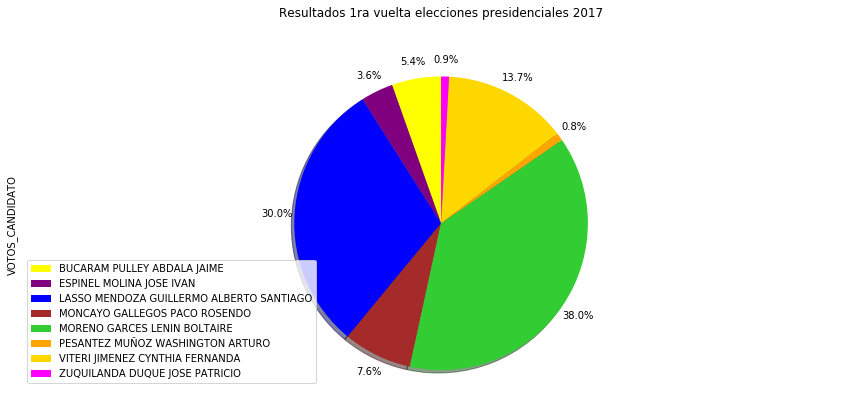

In [18]:
Colores= ['yellow','purple','blue','brown','limegreen','orange','gold','magenta']

df_rp['VOTOS_CANDIDATO'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=Colores,
                            pctdistance=1.12,
                            )

# Título del gráfico
plt.title('Resultados 1ra vuelta elecciones presidenciales 2017', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_rp.index, loc='lower left') 

plt.show()

Procedemos a exportar la información 

In [19]:
df_rp.to_excel('Resultados V1 2017.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_rp 

exportación exitosa


## Agrupación de datos por provincia

Procedemos nuevamente a unir las tablas correspondientes para poder aislar los datos que necesitamos.

In [20]:
df_prov=df_p2017.drop(['CANTON_CODIGO','CANTON_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_prov.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE
0,7,EL ORO
1,13,MANABI
2,1,AZUAY
3,6,CHIMBORAZO
4,15,NAPO


In [41]:
df_p=pd.merge(left=df_1V2017, right=df_c2017, how='left', left_on='COD_CANDIDATO', right_on='CODIGO')
df_p.head()

,COD_DIGNIDAD,COD_PROVINCIA,COD_CANTON,COD_PARROQUIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,1,1,260,285,16,2313,269,679,1.0,2.0,21023.0,16.0,1.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,1,260,285,143,812,269,679,1.0,16.0,12002018.0,143.0,1.0,MONCAYO GALLEGOS PACO ROSENDO
2,1,1,260,285,493,588,269,679,1.0,618.0,6.0,493.0,1.0,VITERI JIMENEZ CYNTHIA FERNANDA
3,1,1,260,285,502,3922,269,679,1.0,589.0,35.0,502.0,1.0,MORENO GARCES LENIN BOLTAIRE
4,1,1,260,285,621,64,269,679,1.0,676.0,19.0,621.0,1.0,PESANTEZ MUÑOZ WASHINGTON ARTURO


In [40]:
df_p.head()

,COD_DIGNIDAD,COD_PARROQUIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_NOMBRE
0,1,285,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,285,143,812,269,679,1.0,143.0,MONCAYO GALLEGOS PACO ROSENDO
2,1,285,493,588,269,679,1.0,493.0,VITERI JIMENEZ CYNTHIA FERNANDA
3,1,285,502,3922,269,679,1.0,502.0,MORENO GARCES LENIN BOLTAIRE
4,1,285,621,64,269,679,1.0,621.0,PESANTEZ MUÑOZ WASHINGTON ARTURO


In [27]:
df_p=df_p.dropna()
print(df_p.isnull().sum())

COD_DIGNIDAD        0
COD_PROVINCIA       0
COD_CANDIDATO       0
VOTOS_CANDIDATO     0
BLANCOS             0
NULOS               0
DIGNIDAD_CODIGO     0
CODIGO              0
CANDIDATO_NOMBRE    0
dtype: int64


In [28]:
df_p=pd.merge(left=df_p, right=df_prov, how='left', left_on='COD_PROVINCIA', right_on='PROVINCIA_CODIGO')
df_p.head()

,COD_DIGNIDAD,COD_PROVINCIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_NOMBRE,PROVINCIA_CODIGO,PROVINCIA_NOMBRE
0,1,1,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,1,AZUAY
1,1,1,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,1,AZUAY
2,1,1,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,1,AZUAY
3,1,1,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,1,AZUAY
4,1,1,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,1,AZUAY


In [29]:
df_prov1=df_p.groupby(['PROVINCIA_NOMBRE','CANDIDATO_NOMBRE'])['BLANCOS','NULOS','VOTOS_CANDIDATO'].sum()
df_prov1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


BLANCOS  \
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                    
AMERICA LATINA EL CARIBE Y AFRICA BUCARAM PULLEY ABDALA JAIME               11583.0   
                                  ESPINEL MOLINA JOSE IVAN                  11583.0   
                                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO  11583.0   
                                  MONCAYO GALLEGOS PACO ROSENDO             11583.0   
                                  MORENO GARCES LENIN BOLTAIRE              11583.0   
...                                                                             ...   
ZAMORA CHINCHIPE                  MONCAYO GALLEGOS PACO ROSENDO             53238.0   
                                  MORENO GARCES LENIN BOLTAIRE              53238.0   
                                  PESANTEZ MUÑOZ WASHINGTON ARTURO          53238.0   
                                  VITERI JIMENEZ CYNTHIA FERNANDA           53238.0   
                                  ZUQUILANDA DUQUE JOSE PATRICIO            53238.0   

                                                                               NULOS  \
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                     
AMERICA LATINA EL CARIBE Y AFRICA BUCARAM PULLEY ABDALA JAIME                25029.0   
                                  ESPINEL MOLINA JOSE IVAN                   25029.0   
                                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO   25029.0   
                                  MONCAYO GALLEGOS PACO ROSENDO              25029.0   
                                  MORENO GARCES LENIN BOLTAIRE               25029.0   
...                                                                              ...   
ZAMORA CHINCHIPE                  MONCAYO GALLEGOS PACO ROSENDO             108718.0   
                                  MORENO GARCES LENIN BOLTAIRE              108718.0   
                                  PESANTEZ MUÑOZ WASHINGTON ARTURO          108718.0   
                                  VITERI JIMENEZ CYNTHIA FERNANDA           108718.0   
                                  ZUQUILANDA DUQUE JOSE PATRICIO            108718.0   

                                                                            VOTOS_CANDIDATO  
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                           
AMERICA LATINA EL CARIBE Y AFRICA BUCARAM PULLEY ABDALA JAIME                        8802.0  
                                  ESPINEL MOLINA JOSE IVAN                           4023.0  
                                  LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO         111537.0  
                                  MONCAYO GALLEGOS PACO ROSENDO                     18306.0  
                                  MORENO GARCES LENIN BOLTAIRE                     138294.0  
...                                                                                     ...  
ZAMORA CHINCHIPE                  MONCAYO GALLEGOS PACO ROSENDO                    202426.0  
                                  MORENO GARCES LENIN BOLTAIRE                     675830.0  
                                  PESANTEZ MUÑOZ WASHINGTON ARTURO                   9310.0  
                                  VITERI JIMENEZ CYNTHIA FERNANDA                  269002.0  
                                  ZUQUILANDA DUQUE JOSE PATRICIO                    13794.0  

[216 rows x 3 columns]

Para poder visualizar mejor la información, procedemos a realizar un gráfico de barras con la tabla obtenida

In [32]:
df_prov2=df_prov1['VOTOS_CANDIDATO']
df_prov2=df_prov1.unstack(level=[1])

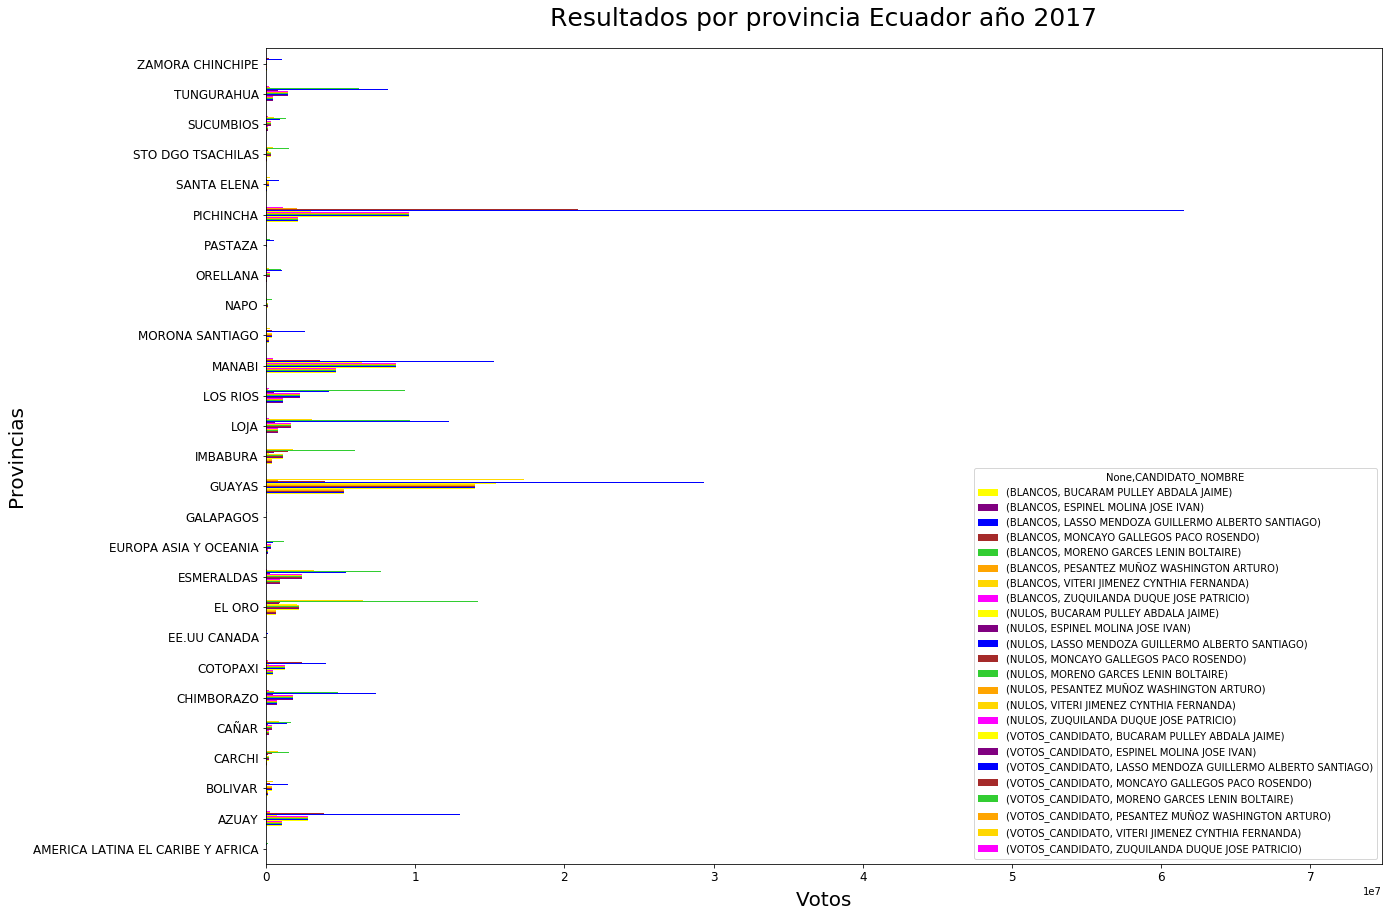

In [33]:
df_prov2.plot(kind='barh', figsize=(20,15), label=None, color=Colores)

plt.xlabel('Votos', fontsize=20, labelpad= 7)
plt.ylabel('Provincias', fontsize=20, labelpad= 7)
plt.title('Resultados por provincia Ecuador año 2017', fontsize=25, y=1.02)
plt.tick_params(labelsize=12)

plt.show()

In [34]:
df_prov1.to_excel('Resultados V1 provinciales 2017.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_prov1
del df_prov2

exportación exitosa


## Agrupando los votos por canton

Nuevamente nos centramos en reunir la información en una sola tabla, esta vez voy a organizar los votos por cantón. Vamos a utilizar la misma tabla unificada, pero esta vez vamos a agrupar la información por cantón y nombre de candidato.

In [36]:
df_cant=df_p2017.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_cant.head()

,CANTON_CODIGO,CANTON_NOMBRE
0,360,ZARUMA
1,440,PORTOVIEJO
2,285,SANTA ISABEL
3,215,ALAUSI
4,620,TENA


In [37]:
df_p=pd.merge(left=df_1V2017, right=df_c2017, how='left', left_on='COD_CANDIDATO', right_on='CODIGO')
df_p.head()

,COD_DIGNIDAD,COD_PROVINCIA,COD_CANTON,COD_PARROQUIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,1,1,260,285,16,2313,269,679,1.0,2.0,21023.0,16.0,1.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,1,260,285,143,812,269,679,1.0,16.0,12002018.0,143.0,1.0,MONCAYO GALLEGOS PACO ROSENDO
2,1,1,260,285,493,588,269,679,1.0,618.0,6.0,493.0,1.0,VITERI JIMENEZ CYNTHIA FERNANDA
3,1,1,260,285,502,3922,269,679,1.0,589.0,35.0,502.0,1.0,MORENO GARCES LENIN BOLTAIRE
4,1,1,260,285,621,64,269,679,1.0,676.0,19.0,621.0,1.0,PESANTEZ MUÑOZ WASHINGTON ARTURO


In [43]:
df_p=df_p.drop(['COD_PROVINCIA','COD_PARROQUIA','OP_CODIGO','NUM_PARTIDO','CANDIDATO_ORDEN_LISTA'], axis=1)
df_p.head()

,COD_DIGNIDAD,COD_CANTON,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_NOMBRE
0,1,260,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,260,143,812,269,679,1.0,143.0,MONCAYO GALLEGOS PACO ROSENDO
2,1,260,493,588,269,679,1.0,493.0,VITERI JIMENEZ CYNTHIA FERNANDA
3,1,260,502,3922,269,679,1.0,502.0,MORENO GARCES LENIN BOLTAIRE
4,1,260,621,64,269,679,1.0,621.0,PESANTEZ MUÑOZ WASHINGTON ARTURO


In [44]:
df_p=df_p.dropna()
print(df_p.isnull().sum())

COD_DIGNIDAD        0
COD_CANTON          0
COD_CANDIDATO       0
VOTOS_CANDIDATO     0
BLANCOS             0
NULOS               0
DIGNIDAD_CODIGO     0
CODIGO              0
CANDIDATO_NOMBRE    0
dtype: int64


In [45]:
df_p=pd.merge(left=df_p, right=df_cant, how='left', left_on='COD_CANTON', right_on='CANTON_CODIGO')
df_p.head()

,COD_DIGNIDAD,COD_CANTON,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE
0,1,260,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,260.0,CUENCA
1,1,260,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,260.0,CUENCA
2,1,260,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,260.0,CUENCA
3,1,260,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,260.0,CUENCA
4,1,260,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,260.0,CUENCA


In [46]:
df_cant1=df_p.groupby(['CANTON_NOMBRE','CANDIDATO_NOMBRE'])['BLANCOS','NULOS','VOTOS_CANDIDATO'].sum()
df_cant1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


BLANCOS    NULOS  \
CANTON_NOMBRE CANDIDATO_NOMBRE                                             
24 DE MAYO    BUCARAM PULLEY ABDALA JAIME                7332.0  10464.0   
              ESPINEL MOLINA JOSE IVAN                   7332.0  10464.0   
              LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO   7332.0  10464.0   
              MONCAYO GALLEGOS PACO ROSENDO              7332.0  10464.0   
              MORENO GARCES LENIN BOLTAIRE               7332.0  10464.0   
...                                                         ...      ...   
ZARUMA        MONCAYO GALLEGOS PACO ROSENDO              5370.0  11680.0   
              MORENO GARCES LENIN BOLTAIRE               5370.0  11680.0   
              PESANTEZ MUÑOZ WASHINGTON ARTURO           5370.0  11680.0   
              VITERI JIMENEZ CYNTHIA FERNANDA            5370.0  11680.0   
              ZUQUILANDA DUQUE JOSE PATRICIO             5370.0  11680.0   

                                                        VOTOS_CANDIDATO  
CANTON_NOMBRE CANDIDATO_NOMBRE                                           
24 DE MAYO    BUCARAM PULLEY ABDALA JAIME                        5576.0  
              ESPINEL MOLINA JOSE IVAN                           3556.0  
              LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO          10620.0  
              MONCAYO GALLEGOS PACO ROSENDO                      8312.0  
              MORENO GARCES LENIN BOLTAIRE                      37720.0  
...                                                                 ...  
ZARUMA        MONCAYO GALLEGOS PACO ROSENDO                      9360.0  
              MORENO GARCES LENIN BOLTAIRE                      48940.0  
              PESANTEZ MUÑOZ WASHINGTON ARTURO                    830.0  
              VITERI JIMENEZ CYNTHIA FERNANDA                   50690.0  
              ZUQUILANDA DUQUE JOSE PATRICIO                      480.0  

[2104 rows x 3 columns]

In [47]:
df_cant1.to_excel('Resultados V1 cantonales 2017.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_cant1

exportación exitosa


### Agrupando los votos por parroquia

Finalmente, hacemos lo mismo pero por parroquia. 

In [48]:
df_parr=df_p2017.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','CANTON_CODIGO','CANTON_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_parr.head()

,PARROQUIA_CODIGO,PARROQUIA_NOMBRE
0,5,ABANIN
1,10,ABDON CALDERON
2,15,ABDON CALDERON / LA UNION
3,20,ACHUPALLAS
4,25,AHUANO


In [49]:
df_p=pd.merge(left=df_1V2017, right=df_c2017, how='left', left_on='COD_CANDIDATO', right_on='CODIGO')
df_p.head()

,COD_DIGNIDAD,COD_PROVINCIA,COD_CANTON,COD_PARROQUIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,1,1,260,285,16,2313,269,679,1.0,2.0,21023.0,16.0,1.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,1,260,285,143,812,269,679,1.0,16.0,12002018.0,143.0,1.0,MONCAYO GALLEGOS PACO ROSENDO
2,1,1,260,285,493,588,269,679,1.0,618.0,6.0,493.0,1.0,VITERI JIMENEZ CYNTHIA FERNANDA
3,1,1,260,285,502,3922,269,679,1.0,589.0,35.0,502.0,1.0,MORENO GARCES LENIN BOLTAIRE
4,1,1,260,285,621,64,269,679,1.0,676.0,19.0,621.0,1.0,PESANTEZ MUÑOZ WASHINGTON ARTURO


In [50]:
df_p=df_p.drop(['COD_PROVINCIA','COD_CANTON','OP_CODIGO','NUM_PARTIDO','CANDIDATO_ORDEN_LISTA'], axis=1)
df_p.head()

,COD_DIGNIDAD,COD_PARROQUIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_NOMBRE
0,1,285,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,285,143,812,269,679,1.0,143.0,MONCAYO GALLEGOS PACO ROSENDO
2,1,285,493,588,269,679,1.0,493.0,VITERI JIMENEZ CYNTHIA FERNANDA
3,1,285,502,3922,269,679,1.0,502.0,MORENO GARCES LENIN BOLTAIRE
4,1,285,621,64,269,679,1.0,621.0,PESANTEZ MUÑOZ WASHINGTON ARTURO


In [51]:
df_p=pd.merge(left=df_p, right=df_parr, how='left', left_on='COD_PARROQUIA', right_on='PARROQUIA_CODIGO')
df_p.head()

,COD_DIGNIDAD,COD_PARROQUIA,COD_CANDIDATO,VOTOS_CANDIDATO,BLANCOS,NULOS,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE
0,1,285,16,2313,269,679,1.0,16.0,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,285.0,BAÑOS
1,1,285,143,812,269,679,1.0,143.0,MONCAYO GALLEGOS PACO ROSENDO,285.0,BAÑOS
2,1,285,493,588,269,679,1.0,493.0,VITERI JIMENEZ CYNTHIA FERNANDA,285.0,BAÑOS
3,1,285,502,3922,269,679,1.0,502.0,MORENO GARCES LENIN BOLTAIRE,285.0,BAÑOS
4,1,285,621,64,269,679,1.0,621.0,PESANTEZ MUÑOZ WASHINGTON ARTURO,285.0,BAÑOS


In [53]:
df_parr=df_p.groupby(['PARROQUIA_NOMBRE','CANDIDATO_NOMBRE'])['BLANCOS','NULOS','VOTOS_CANDIDATO'].sum()
df_parr.head(16)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


BLANCOS  NULOS  \
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                           
10 DE AGOSTO     BUCARAM PULLEY ABDALA JAIME                 404.0  573.0   
                 ESPINEL MOLINA JOSE IVAN                    404.0  573.0   
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO    404.0  573.0   
                 MONCAYO GALLEGOS PACO ROSENDO               404.0  573.0   
                 MORENO GARCES LENIN BOLTAIRE                404.0  573.0   
                 PESANTEZ MUÑOZ WASHINGTON ARTURO            404.0  573.0   
                 VITERI JIMENEZ CYNTHIA FERNANDA             404.0  573.0   
                 ZUQUILANDA DUQUE JOSE PATRICIO              404.0  573.0   
10 NOVIEMBRE     BUCARAM PULLEY ABDALA JAIME                  45.0  133.0   
                 ESPINEL MOLINA JOSE IVAN                     45.0  133.0   
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO     45.0  133.0   
                 MONCAYO GALLEGOS PACO ROSENDO                45.0  133.0   
                 MORENO GARCES LENIN BOLTAIRE                 45.0  133.0   
                 PESANTEZ MUÑOZ WASHINGTON ARTURO             45.0  133.0   
                 VITERI JIMENEZ CYNTHIA FERNANDA              45.0  133.0   
                 ZUQUILANDA DUQUE JOSE PATRICIO               45.0  133.0   

                                                           VOTOS_CANDIDATO  
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                           
10 DE AGOSTO     BUCARAM PULLEY ABDALA JAIME                          75.0  
                 ESPINEL MOLINA JOSE IVAN                             82.0  
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           1160.0  
                 MONCAYO GALLEGOS PACO ROSENDO                       187.0  
                 MORENO GARCES LENIN BOLTAIRE                       1934.0  
                 PESANTEZ MUÑOZ WASHINGTON ARTURO                     28.0  
                 VITERI JIMENEZ CYNTHIA FERNANDA                     275.0  
                 ZUQUILANDA DUQUE JOSE PATRICIO                       58.0  
10 NOVIEMBRE     BUCARAM PULLEY ABDALA JAIME                         119.0  
                 ESPINEL MOLINA JOSE IVAN                             30.0  
                 LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            267.0  
                 MONCAYO GALLEGOS PACO ROSENDO                        31.0  
                 MORENO GARCES LENIN BOLTAIRE                        605.0  
                 PESANTEZ MUÑOZ WASHINGTON ARTURO                      5.0  
                 VITERI JIMENEZ CYNTHIA FERNANDA                     162.0  
                 ZUQUILANDA DUQUE JOSE PATRICIO                       13.0

Comprobamos la información usando la parroquia TARQUI. 

In [54]:
df_parr.loc['TARQUI']

,BLANCOS,NULOS,VOTOS_CANDIDATO
CANDIDATO_NOMBRE,,,
BUCARAM PULLEY ABDALA JAIME,6968.0,31567.0,37555.0
ESPINEL MOLINA JOSE IVAN,6968.0,31567.0,16162.0
LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,6968.0,31567.0,10335.0
MONCAYO GALLEGOS PACO ROSENDO,6968.0,31567.0,12491.0
MORENO GARCES LENIN BOLTAIRE,6968.0,31567.0,54409.0
PESANTEZ MUÑOZ WASHINGTON ARTURO,6968.0,31567.0,2168.0
VITERI JIMENEZ CYNTHIA FERNANDA,6968.0,31567.0,167.0
ZUQUILANDA DUQUE JOSE PATRICIO,6968.0,31567.0,2340.0


In [55]:
df_parr.to_excel('Resultados V1 parroquiales 2017.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_parr

exportación exitosa
